In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from numpy import heaviside
import numpy as np
from scipy.spatial import distance

# AND gate

An AND gate receives two inputs (a, b) and returns an output as follows:

In [2]:
'''
a|b|out
0|0|0
0|1|0
1|0|0
1|1|1
'''

'\na|b|out\n0|0|0\n0|1|0\n1|0|0\n1|1|1\n'

Imagining an activation function of the heavside step function `step(x, c)` where `1 if x >= c and 0 if x < c` and letting c = 0.5, one can begin to see how this activation function on a single neuron (perceptron) will allow for an ANN to compute the AND of two inputs. <br>
By setting a function `f(x1, x2) = step(w1*x1+w2*x2+b, 0.5)` and solving for w1, w1, b with respect to the following<br>
> `1 = step(w1*1+w2*1+b, 0.5)`<br>
> `0 = step(w1*0+w2*1+b, 0.5)`<br>
> `0 = step(w1*1+w2*0+b, 0.5)`<br>
> `0 = step(w1*0+w2*0+b, 0.5)`<br>
Then simplifying<br>
> `1 = step(w1+w2+b, 0.5)`<br>
> `0 = step(w2+b, 0.5)`<br>
> `0 = step(w1+b, 0.5)`<br>
> `0 = step(b, 0.5)`<br>
It is clear that a solution to the system of equations has `w1=0.25, w2=0.25, b=0`<br>
Also, it is clear that only a single neuron is necessary to create an AND gate

Visualization of problem

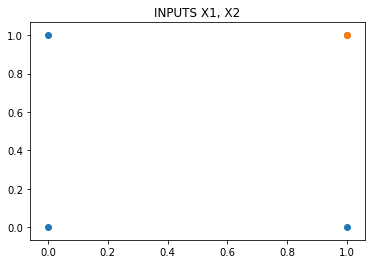

In [3]:
import matplotlib.pyplot as plt

x1 = [1,1,0,0] 
x2 = [1,0,1,0]
plt.scatter(x1, x2)
plt.scatter([x1[0]],[x2[0]])
plt.title("INPUTS X1, X2")
plt.show()

AND function with single neuron, and proper weights

In [4]:
import matplotlib.pyplot as plt
def and_gate(x):
    y = (0.25*x[0])+(0.25*x[1])
    return 0 if y < 0.5 else 1
X = [[1,1], [1,0], [0,1], [0,0]] 
y = [1, 0, 0, 0]
for x in range(4):
    print(X[x][0], "AND", X[x][1], "|",end="")
    print(and_gate(X[x]))
plt.show()

1 AND 1 |1
1 AND 0 |0
0 AND 1 |0
0 AND 0 |0


But can a perceptron learn the AND function?
Well it should be able to. This is because the AND function is linearly seperable.<br>

A perceptron is a linear function that finds some hyperplane to seperate data into two classes. <br> 

In this case *hyperplane* is referring to the linear boundary which splits data into two categories represented by the line orthagonal to $t=x1*w1+x2*w2$ where t is the threshold for the step function, and t=0.5 <br>



In [11]:
from tqdm import tqdm
from scipy.spatial import distance
def step(input):
    return 0 if input < 0.5 else 1
def neural_func(x, weights):
    return np.dot(x, weights)
def train(X, y, learning_rate, epochs = 30):
    weights = [1,1]
    for _ in tqdm(range(epochs)):
        for x in range(4):
            pred = step(neural_func(X[x], weights))
            #Hyperplance is orthogonal to weights vector
            #Optimal hyperplane exists where 0.5=w1x1+w2x2 as this will be a 50/50 split due to the step function changing from 0 to 1 at 0.5!. So subtracting the weight gradient from weights when w1x1+w2x2 >= 0.5
            # will force the hyperplane to converge to 0.5
            if neural_func(X[x], weights) >= 0.5:
                #Weight gradients are d/dw1(w1x1+w2x2+b)=x1 and d/dw2(w1x1+w2x2+b)=x2
                print(learning_rate*X[x][0], X[x])
                weights[0] -= learning_rate*X[x][0]
                weights[1] -= learning_rate*X[x][1] 
    return weights
def test(test_x, test_y, optimal_weights):
    accuracies = []

    print(f"RESULTING EQUATION: y={optimal_weights[0]}*x1+{optimal_weights[1]}*x2")
    print("INPUT", "PREDICTED", "REAL")
    for x in range(len(test_x)):
        # print(neural_func(, optimal_weights))
        print(test_x[x],"\t",step(neural_func(test_x[x], optimal_weights)), "\t",test_y[x])
        if step(neural_func(test_x[x], optimal_weights))==test_y[x]:
            accuracies.append(1)
        else:
            accuracies.append(0)
    print("ACCURACY:", 100*sum(accuracies)/len(accuracies), "%")
    return 100*sum(accuracies)/len(accuracies)
test([[1,0], [1,1], [0,1], [0,0]], [0,1,0,0], train(X, y, 0.01, 25))

100%|██████████| 25/25 [00:00<00:00, 1545.41it/s]

0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
0.01 [1, 1]
0.0 [0, 1]
0.01 [1, 0]
RESULTING EQUATION: y=0.49999999999999956*x1+0.49999999999999956*x2
INPUT PREDICTED REAL
[1, 0] 	 0 	 1
[1, 1] 	 1 	 0
[0, 1]

0.0

## OR GATE

Now we can use our method from the AND gate section

In [8]:
X = [[1,1],[0,1],[1,0],[0,0]]
y = [1,1,1,0]
test(X, y, train(X, y, 0.001, 3))

100%|██████████| 3/3 [00:00<00:00, 6739.64it/s]

0.001 [1, 1]
0.0 [0, 1]
0.001 [1, 0]
0.001 [1, 1]
0.0 [0, 1]
0.001 [1, 0]
0.001 [1, 1]
0.0 [0, 1]
0.001 [1, 0]
RESULTING EQUATION: y=0.994*x1+0.994*x2
INPUT PREDICTED REAL
[1, 1] 	 1 	 1
[0, 1] 	 1 	 1
[1, 0] 	 1 	 1
[0, 0] 	 0 	 0
ACCURACY: 100.0 %


100.0

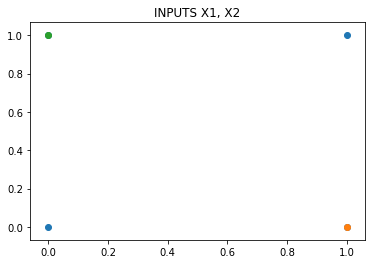

In [10]:
import matplotlib.pyplot as plt

x1 = [1,1,0,0] 
x2 = [1,0,1,0]
plt.scatter(x1, x2)
plt.scatter([x1[1]],[x2[1]])
plt.scatter([x1[2]],[x2[2]])
plt.title("INPUTS X1, X2")
plt.show()